In [44]:
import pandas as pd

df = pd.read_csv("dd_clean")
df.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,1,university,0,0,0,1
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,...,10000,9000,689,679,0,university,0,0,0,1


In [45]:
x_vars = ['LIMIT_BAL', 'default payment next month',
    'SEX', 
    'EDUCATION',
    'MARRIAGE', 
    'AGE',
    'PAY_1', 
    'BILL_AMT1',     
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','graduate school', 
    'high school',
    'others', 'university'
    ]

In [46]:
corr = df[x_vars].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,default payment next month,SEX,EDUCATION,MARRIAGE
LIMIT_BAL,1.000000,-0.154423,0.027046,-0.232688,-0.111873
default payment next month,-0.154423,1.000000,-0.039945,0.034966,-0.026030
SEX,0.027046,-0.039945,1.000000,0.014336,-0.031307
EDUCATION,-0.232688,0.034966,0.014336,1.000000,-0.137097
MARRIAGE,-0.111873,-0.026030,-0.031307,-0.137097,1.000000


<AxesSubplot:>

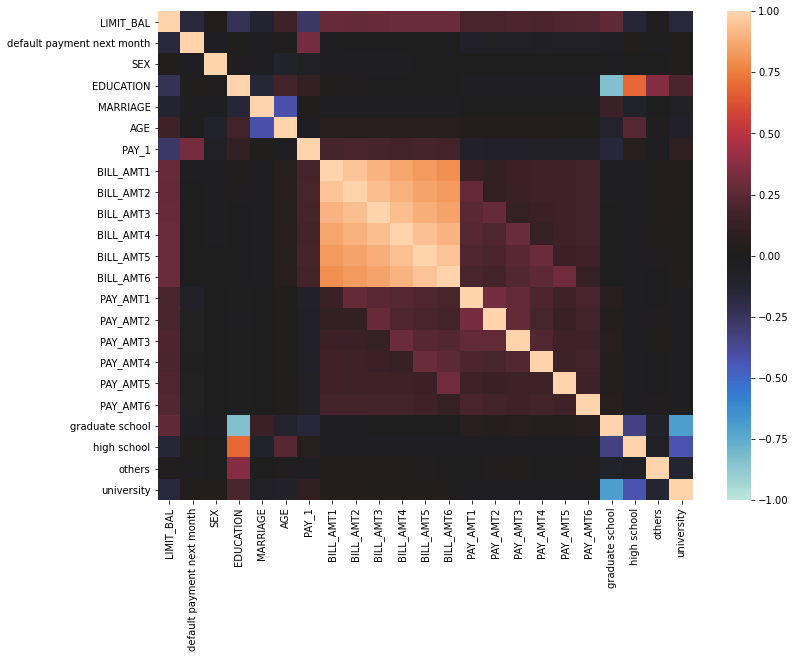

In [47]:
plt.figure(figsize=(12, 9))
sns.heatmap(df[x_vars].corr(), vmin=-1, center=0, vmax=1)

In [154]:
df.shape

(30000, 25)

In [155]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

Verificando se a coluna ID são valores exclusivos

Verificou-se que existem 29687 ID exclusivos. Os números exclusivos são menores que o número de linhas, ou seja, existe duplicação de IDs. Ou seja temos um problema de qualidade de dados! 

No entando em que quantidade? Vamos ver.

In [146]:
df['ID'].nunique()

29687

In [147]:
df.shape

(30000, 25)

In [150]:
id_counts = df['ID'].value_counts()
id_counts.head()

c8bb762f-3ef9    2
9db1809e-845a    2
94e1b326-8c22    2
1c7af562-f271    2
85bd7f39-2e9b    2
Name: ID, dtype: int64

In [151]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [139]:
id_counts.value_counts() #exibir as entradas duplicadas agrupadas executando outra contagem de valores

1    26664
Name: ID, dtype: int64

Nenhum ID ocorre mais de duas vezes. Vamos corrigir esses problemas de qualidade de dados.

## Mascaras Booleanas

In [10]:
import numpy as np #calculo númerico

In [11]:
np.random.seed(seed=24)

In [12]:
random_integers = np.random.randint(low=1,high=5,size=100)

In [13]:
random_integers[:5]

array([3, 4, 1, 4, 2])

Suponhamos que queremos conhecer os locais de toos os elementos de random_integers igual a 3.

In [14]:
is_equal_to_3 = random_integers == 3 #Criando umas mascara booleana para fazer isso

In [15]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

Para saber a quantidade de elementos iguais a 3

In [16]:
sum(is_equal_to_3)

22

In [17]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [18]:
dupe_mask = id_counts == 2

In [19]:
dupe_mask

c8bb762f-3ef9     True
9db1809e-845a     True
94e1b326-8c22     True
1c7af562-f271     True
85bd7f39-2e9b     True
                 ...  
08c2cdbb-4c0f    False
647dd7c8-3d37    False
06ca380a-522b    False
784a1f74-ed28    False
81da389a-8bff    False
Name: ID, Length: 29687, dtype: bool

In [20]:
dupe_mask[0:10]

c8bb762f-3ef9    True
9db1809e-845a    True
94e1b326-8c22    True
1c7af562-f271    True
85bd7f39-2e9b    True
7c9b7473-cc2f    True
129c43ca-42ee    True
999b7824-373c    True
5f483bdb-3aaf    True
ffb9a143-c375    True
Name: ID, dtype: bool

In [21]:
id_counts.index[0:5]

Index(['c8bb762f-3ef9', '9db1809e-845a', '94e1b326-8c22', '1c7af562-f271',
       '85bd7f39-2e9b'],
      dtype='object')

In [22]:
dupe_ids = id_counts.index[dupe_mask]

In [23]:
dupe_ids = list(dupe_ids)

In [24]:
len(dupe_ids)

313

In [25]:
dupe_ids[:5]

['c8bb762f-3ef9',
 '9db1809e-845a',
 '94e1b326-8c22',
 '1c7af562-f271',
 '85bd7f39-2e9b']

In [26]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
18229,c8bb762f-3ef9,50000,1,2,1,54,Not available,2,2,3,...,38233,37318,39757,0,5500,0,0,3036,2000,1
18329,c8bb762f-3ef9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18485,9db1809e-845a,130000,2,2,2,26,0,0,0,2,...,133747,134230,131986,6000,12600,4900,5105,0,5050,0
18585,9db1809e-845a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22527,94e1b326-8c22,120000,2,3,2,47,-1,0,0,-1,...,460,338,679,2327,1083,500,350,700,500,0
22627,94e1b326-8c22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_zero_mask = df == 0


In [29]:
df_zero_mask.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [30]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [31]:
sum(feature_zero_mask)

315

In [32]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [33]:
df_clean_1.shape

(29685, 25)

In [34]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [35]:
df_clean_1['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [36]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Iremos utilizar umas máscara lógica com o operador != (diferente de ) para encontrar todas as linhas que não têm dados ausentes

In [37]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [38]:
df_clean_1[0:5]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [39]:
sum(valid_pay_1_mask)

26664

In [40]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [41]:
df_clean_2.shape

(26664, 25)

In [42]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [43]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [160]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

## Explorando os dados - Histogramas

In [163]:
import matplotlib.pyplot as plt #importa o pacte de plotagem
#renderiza a plotagem automaticamente
%matplotlib inline

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

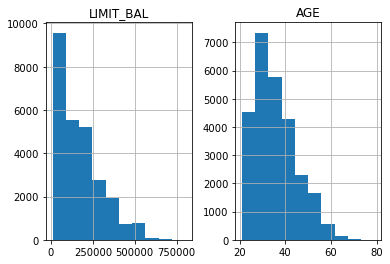

In [164]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [165]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [166]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [167]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4,inplace=True) #método relace faz substituições

In [168]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

Obs: Fizemos as alterações INLOCO (inplace=True

In [169]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [170]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3,inplace=True)

In [171]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

## Implementando OHE para características categóricas

Precisamos preencher a nova coluna com as strings apropriadas. O pandas fornece uma funcionalidade conveniente para o mapeamento dos valores de uma série para novo valores. A função .map que usa um dicionario para estabelcer a correspondencia entre os valores antigos e os novos. 

Crie um dicionario que descreva o mapeamente das categorias de instrução


In [329]:
df_clean_2['EDUCATION_CAT'] = 'none'

cat_mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}

df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)


In [330]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [176]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [331]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis = 1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [332]:
df_with_ohe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [333]:
df_with_ohe.to_csv('Chapter_1_cleaned_data.csv', index=False)

Explorando as caracteristicas de histórico financeiro do dataset

In [182]:
df = pd.read_csv('Chapter_1_cleaned_data.csv')

In [181]:
import pandas as pd

In [183]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [184]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [68]:
df.shape

(26664, 30)

In [185]:
pay_feats = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [186]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [187]:
df[pay_feats[0]].value_counts().sort_index

<bound method Series.sort_index of  0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64>

<AxesSubplot:>

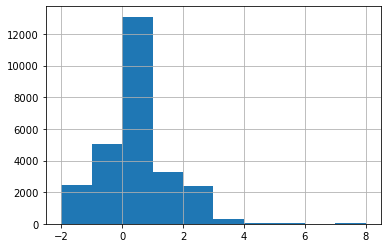

In [188]:
df[pay_feats[0]].hist() 
# através do gráfico podemos inferir que a maioria das contas está em boa situação(valores -2,-1,0)

In [73]:
import mpl_toolkits as mpl

In [74]:
import numpy as np

In [75]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins


array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

In [76]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'num de contas')

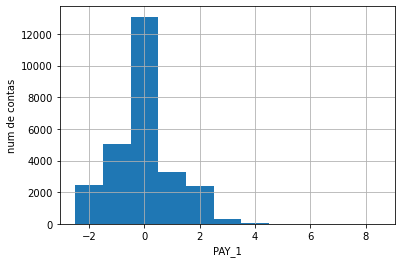

In [189]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('num de contas')

In [82]:
import matplotlib.pyplot as plt

In [84]:
!pip install mpl

ERROR: Could not find a version that satisfies the requirement mpl (from versions: none)
ERROR: No matching distribution found for mpl


In [ ]:
from mpl import rcParams

array([[<AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>],
       [<AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>, <AxesSubplot:>]],
      dtype=object)

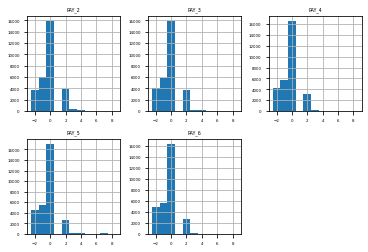

In [334]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins= pay_1_bins, layout=(2,3))

In [86]:
df.loc[df['PAY_2']==2,['PAY_2', 'PAY_3']].head() #dados inconsistentes. 
#a unica maneira de chegarmos a um atraso de 2 meses seria haver um atraso de um mês no mês anterior

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


Examinando as caracteristicas financeiras do restante. Usaremos o logaritma com apply

In [194]:
#Listas com nomes para as caracteristicas financeiras restantes
contas_ = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pag_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [88]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [195]:
df[contas_].describe()
#cobrança média mensal é de aproximadamente 40k a 50kdol taiwaneses. Alguns valores de faturas negativos taqlvez uma antecipação
# que apareceria na fatura do mês atual

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

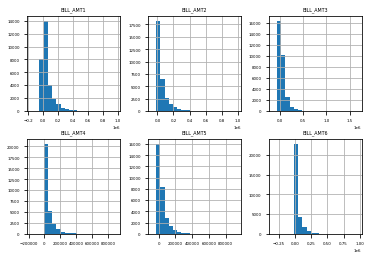

In [335]:
df[contas_].hist(bins=20, layout=(2,3))

In [336]:
df[pag_amt].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267
std,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000
50%,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

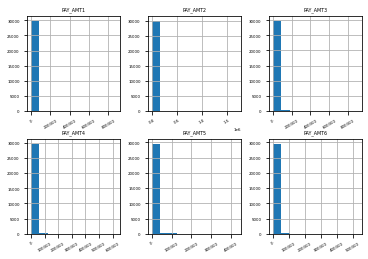

In [337]:
df[pag_amt].hist(layout=(2,3), xrot=30)

In [338]:
pag_zero_maks = df[pag_amt] == 0
pag_zero_maks.sum()


PAY_AMT1    5504
PAY_AMT2    5663
PAY_AMT3    6223
PAY_AMT4    6660
PAY_AMT5    6955
PAY_AMT6    7416
dtype: int64

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

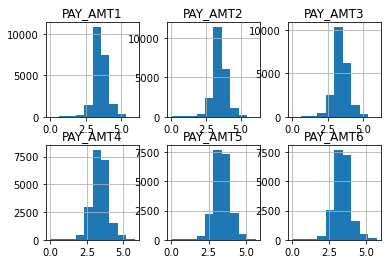

In [199]:
df[pag_amt][~pag_zero_maks].apply(np.log10).hist(layout=(2,3)) 

In [200]:
df.to_csv('dd_clean')

In [201]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] == 400

False

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression


In [203]:
df_2 = pd.read_csv('dd_clean')

In [204]:
df_2['default payment next month'].mean() #proporção de classe positiva 

0.2217971797179718

In [205]:
df_2.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [ ]:
df_2.head()

In [ ]:
df_2.info()

In [208]:
df_2.select_dtypes(include="number").columns

Index(['Unnamed: 0', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'graduate school', 'high school',
       'others', 'university'],
      dtype='object')

In [209]:
x_num = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'graduate school', 'high school',
       'others', 'university']

In [210]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_2[x_num])
scaler.get_feature_names_out()

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month', 'graduate school',
       'high school', 'others', 'university'], dtype=object)

In [211]:
df_2['default payment next month'].mean() #proporção de classe positiva 

0.2217971797179718

In [212]:
x_vars = ['LIMIT_BAL', 
    'SEX', 
    'EDUCATION',
    'MARRIAGE', 
    'AGE',
    'PAY_1', 
    'BILL_AMT1',     
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6',
    'PAY_AMT1',
    'graduate school', 
    'high school',
    'others', 'university'
    ]

In [219]:
df_2.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [214]:
df_2.to_csv('data_clear_final')


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tb_class = pd.read_csv('data_clear_final')

In [6]:
tb_class.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [10]:
tb_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

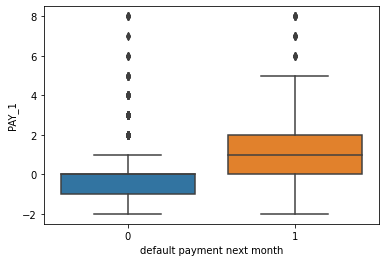

In [7]:
sns.boxplot(
    data=tb_class,
    x="default payment next month",
    y="PAY_1",
);

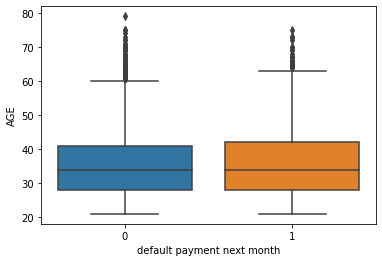

In [14]:
sns.boxplot(
    data=tb_class,
    x="default payment next month",
    y=tb_class['AGE'],
);

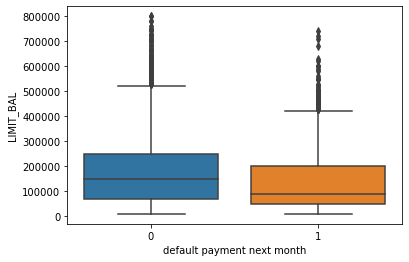

<AxesSubplot:>

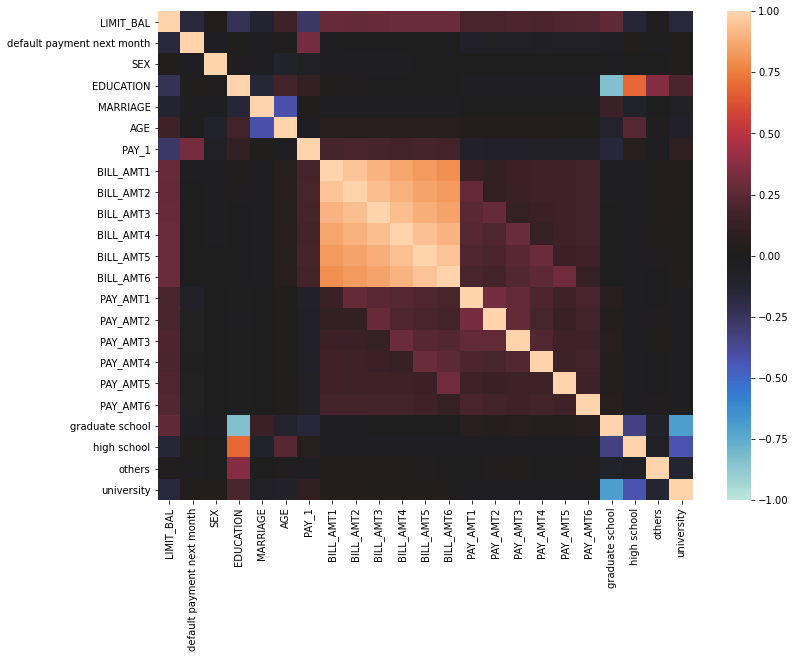

In [48]:
plt.figure(figsize=(12, 9))
sns.heatmap(tb_class[x_vars].corr(), vmin=-1, center=0, vmax=1)

## Modelo de Classificação - Pagou não pagou

Regressão Logistica

Divisão test/train possibilita que avaliemos o modelo em todas as suas etapas. Pré-proessamento, aprendizagem e avaliação.

In [17]:
tb_class = pd.read_csv('data_clear_final')

In [18]:
tb_class.head()

,Unnamed: 0,Unnamed: 0.1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,0,0,798fc410-45c1,20000,2,2,1,24,2,2,...,0,0,0,0,1,university,0,0,0,1
1,1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,...,1000,1000,0,2000,1,university,0,0,0,1
2,2,2,85698822-43f5,90000,2,2,2,34,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,3,3,0737c11b-be42,50000,2,2,1,37,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [19]:
tb_class.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [20]:
tb_class.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


<AxesSubplot:xlabel='default payment next month', ylabel='count'>

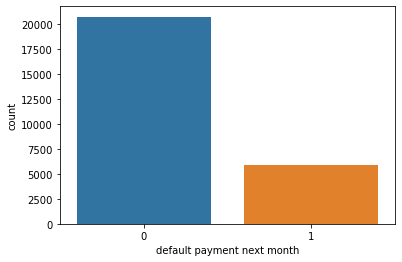

In [21]:
sns.countplot(x='default payment next month', data=tb_class)

In [22]:
contagem = tb_class['default payment next month'].value_counts()

In [23]:
#Amostra desbalanceada
print('Classe 0 = ',contagem[0])
print('Classe 1 = ',contagem[1])

Classe 0 =  20750
Classe 1 =  5914


In [24]:
dados_1 = tb_class[tb_class['default payment next month']==1]
dados_0 = tb_class[tb_class['default payment next month']==0]

In [25]:
dados_0_novo = dados_0.sample(n=contagem[1], random_state=42)

In [26]:
dados = pd.concat([dados_0_novo, dados_1])

In [27]:
contagem = dados['default payment next month'].value_counts()
print('Classe 0 = ',contagem[0])
print('Classe 1 = ',contagem[1])


Classe 0 =  5914
Classe 1 =  5914


In [28]:
x_vars = ['LIMIT_BAL', 'default payment next month',
    'SEX', 
    'EDUCATION',
    'MARRIAGE', 
    'AGE',
    'PAY_1', 
    'BILL_AMT1',     
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','graduate school', 
    'high school',
    'others', 'university'
    ]
y_vars = 'default payment next month'
X = dados[x_vars]
y = dados[y_vars]

In [34]:
corr = dados[x_vars].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,default payment next month,SEX,EDUCATION,MARRIAGE
LIMIT_BAL,1.000000,-0.195522,0.042187,-0.250793,-0.102137
default payment next month,-0.195522,1.000000,-0.048307,0.046057,-0.031288
SEX,0.042187,-0.048307,1.000000,0.004981,-0.038590
EDUCATION,-0.250793,0.046057,0.004981,1.000000,-0.136399
MARRIAGE,-0.102137,-0.031288,-0.038590,-0.136399,1.000000


<AxesSubplot:>

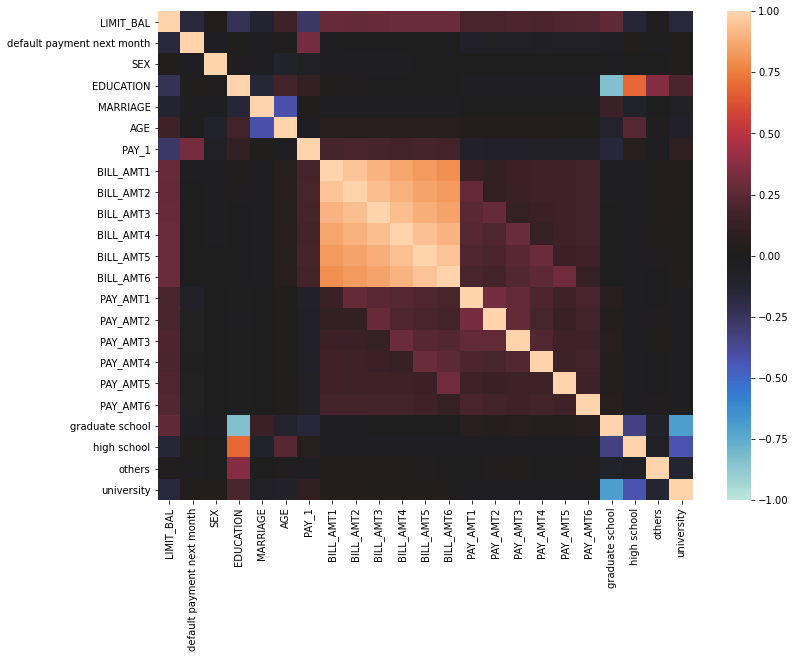

In [29]:
plt.figure(figsize=(12, 9))
sns.heatmap(tb_class[x_vars].corr(), vmin=-1, center=0, vmax=1)

In [366]:
from sklearn.model_selection import train_test_split

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [367]:
from sklearn.linear_model import LogisticRegression
log_fit = LogisticRegression()
log_fit.fit(X_train, y_train)

c:\Users\Lucas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [368]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_log)

0.5606060606060606

In [310]:
tb_pred_log = pd.DataFrame({"y_real": y_test, "y_previsto": y_test_log})
tb_pred_log.head()

,y_real,y_previsto
25074,0,1
19979,1,1
24062,0,1
18764,1,1
17580,0,0


In [311]:
pd.crosstab(tb_pred_log["y_real"], tb_pred_log["y_previsto"], margins=True)

y_previsto,0,1,All
y_real,,,
0,759,728,1487
1,422,1048,1470
All,1181,1776,2957


## kNN - Neareast Neighbors

In [312]:
knn_fit = KNeighborsClassifier(n_neighbors=100)
knn_fit.fit(X_train, y_train)

y_test_knn = knn_fit.predict(X_test)
print(f"F1-Score: {np.around(f1_score(y_test, y_test_knn), 2)}")

F1-Score: 0.64


In [313]:
list(range(5, 56, 10))

[5, 15, 25, 35, 45, 55]

In [314]:
for k in range(5, 56, 10):
    print(f"Testanto k = {k}")
    knn_fit = KNeighborsClassifier(n_neighbors=k)
    knn_fit.fit(X_train, y_train)

    y_test_knn = knn_fit.predict(X_test)
    print(f"F1-Score: {np.around(f1_score(y_test, y_test_knn), 2)}")

Testanto k = 5
F1-Score: 0.6
Testanto k = 15
F1-Score: 0.62
Testanto k = 25
F1-Score: 0.64
Testanto k = 35
F1-Score: 0.64
Testanto k = 45
F1-Score: 0.64
Testanto k = 55
F1-Score: 0.63


In [315]:
for k in range(5, 106, 10):
    print(f"Testanto k = {k}")
    knn_fit = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn_fit.fit(X_train, y_train)

    y_test_knn = knn_fit.predict(X_test)
    print(f"F1-Score: {np.around(f1_score(y_test, y_test_knn), 2)}")

Testanto k = 5
F1-Score: 0.6
Testanto k = 15
F1-Score: 0.62
Testanto k = 25
F1-Score: 0.64
Testanto k = 35
F1-Score: 0.63
Testanto k = 45
F1-Score: 0.64
Testanto k = 55
F1-Score: 0.64
Testanto k = 65
F1-Score: 0.65
Testanto k = 75
F1-Score: 0.65
Testanto k = 85
F1-Score: 0.65
Testanto k = 95
F1-Score: 0.65
Testanto k = 105
F1-Score: 0.65


In [319]:
knn_fit = KNeighborsClassifier(n_neighbors=85, weights='distance')
knn_fit.fit(X_train, y_train)

y_test_knn = knn_fit.predict(X_test)
print(f"F1-Score: {np.around(f1_score(y_test, y_test_knn), 2)}")

F1-Score: 0.65


## Árvores de Decisão

In [328]:
from sklearn.tree import DecisionTreeClassifier
dt_fit = DecisionTreeClassifier(max_depth = 134, min_samples_split=2)
dt_fit.fit(X_train, y_train)

dt_pred = dt_fit.predict(X_test)
dt_f1 = f1_score(y_test, dt_pred)
print(f"F1 DT: {dt_f1}")

F1 DT: 1.0


In [326]:
f1_score_dt = []

for d in range(4, 150, 10):
    dt_fit = DecisionTreeClassifier(max_depth=d)
    dt_fit.fit(X_train, y_train)
    y_test_dt = dt_fit.predict(X_test)
    f1_score_dt.append(f1_score(y_test, y_test_dt))


In [321]:
tb_depth_f1 = pd.DataFrame({"f1": f1_score_dt})
tb_depth_f1["depth"] = list(range(4, 150, 10))

In [322]:
tb_depth_f1

,f1,depth
0,1.0,4
1,1.0,14
2,1.0,24
3,1.0,34
4,1.0,44
5,1.0,54
6,1.0,64
7,1.0,74
8,1.0,84
9,1.0,94


## Redes Neurais

In [302]:
from sklearn.neural_network import MLPClassifier

nn_fit = MLPClassifier(hidden_layer_sizes=(10, 10, 2), activation = 'relu')
nn_fit.fit(X_train, y_train)

nn_pred = nn_fit.predict(X_test)
nn_f1 = f1_score(y_test, nn_pred)
print(f"F1 NN: {nn_f1}")

F1 NN: 0.6641066184775243


## Floresta Aleatória 

In [304]:
from sklearn.ensemble import RandomForestClassifier

rf_fit = RandomForestClassifier(n_estimators=100, max_depth=15)
rf_fit.fit(X_train, y_train)

RandomForestClassifier(max_depth=15)

In [305]:
rf_pred = rf_fit.predict(X_test)

rf_f1 = f1_score(y_test, rf_pred)
print(f"F1 RF: {rf_f1}")

F1 RF: 1.0


## Boosting

In [306]:
!pip install Catboost

In [307]:
from catboost import CatBoostClassifier

In [308]:
cat_fit = CatBoostClassifier(iterations = 1000, depth = 8, verbose = False)
cat_fit.fit(X_train, y_train)

In [309]:
cat_pred = cat_fit.predict(X_test)
cat_f1 = f1_score(y_test, cat_pred)
print(f"F1 Cat: {cat_f1}")

F1 Cat: 1.0
